## Advanced Lane Finding Project

Goals:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Camera Calibration

OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository (note these are 9x6 chessboard images, unlike the 8x6 images used in the lesson). The distortion matrix should be used to un-distort one of the calibration images provided as a demonstration that the calibration is correct. Example of undistorted calibration image is Included in the writeup (or saved to a folder).

#### Imports

In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

In [7]:
# Reference: 
# - https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

out_dir='../output_images/'

# ############# Make a list of calibration images   ######
images = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('../camera_cal/c*.jpg')))

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
undistortedimages = []
originalimages = []

# Step through the list and search for chessboard corners
for image in images:
    filename, image = image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    ############### change chessboard size to 9x6 instead of 8x6. ###############
    for ny in [5,6]:
        for nx in [6,7,8,9]:
            # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
            objp = np.zeros((ny*nx,3), np.float32)
            objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                imgpoints.append(corners)
                objpoints.append(objp)

                # Draw and display the corners
                img_points = cv2.drawChessboardCorners(image.copy(), (nx,ny), corners, ret)
                undistortedimages.append(img_points)
                originalimages.append(image)
                image_name=os.path.split(filename)[1]
                write_name = out_dir+'corner_'+str(ny)+'_x_'+str(nx)+'_'+image_name
                print(write_name)
                cv2.imwrite(write_name, img_points)
                
print('Found {} image with corner.'.format(len(undistortedimages)))

../output_images/corner_5_x_9_calibration1.jpg
../output_images/corner_6_x_9_calibration10.jpg
../output_images/corner_6_x_9_calibration11.jpg
../output_images/corner_6_x_9_calibration12.jpg
../output_images/corner_6_x_9_calibration13.jpg
../output_images/corner_6_x_8_calibration14.jpg
../output_images/corner_6_x_9_calibration14.jpg
../output_images/corner_5_x_6_calibration15.jpg
../output_images/corner_6_x_6_calibration15.jpg
../output_images/corner_6_x_9_calibration15.jpg
../output_images/corner_6_x_9_calibration16.jpg
../output_images/corner_6_x_9_calibration17.jpg
../output_images/corner_6_x_9_calibration18.jpg
../output_images/corner_6_x_9_calibration19.jpg
../output_images/corner_6_x_8_calibration2.jpg
../output_images/corner_6_x_9_calibration2.jpg
../output_images/corner_6_x_9_calibration20.jpg
../output_images/corner_6_x_9_calibration3.jpg
../output_images/corner_5_x_6_calibration4.jpg
../output_images/corner_5_x_7_calibration5.jpg
../output_images/corner_6_x_7_calibration5.jpg

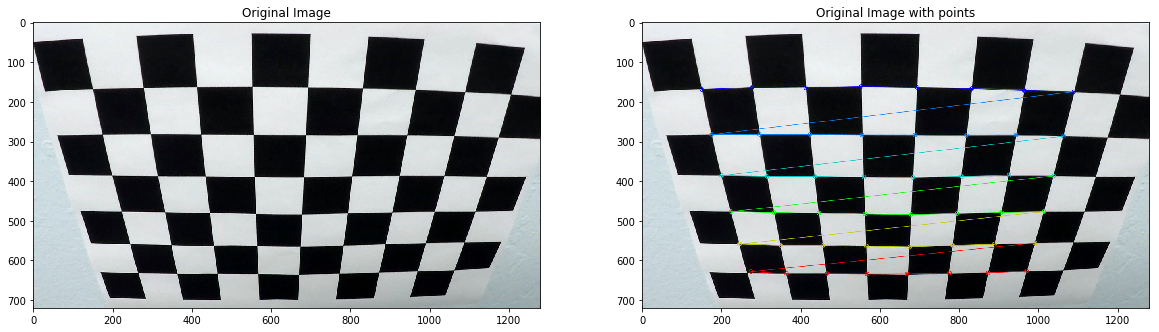

In [8]:
index = 14
original = originalimages[index]
chessPoints = undistortedimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(chessPoints)
axes[1].set_title('Original Image with points')

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('../camera_calibration_pickle.p', 'wb'))

In [10]:
# Load pickled distortion matrix
with open('../camera_calibration_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

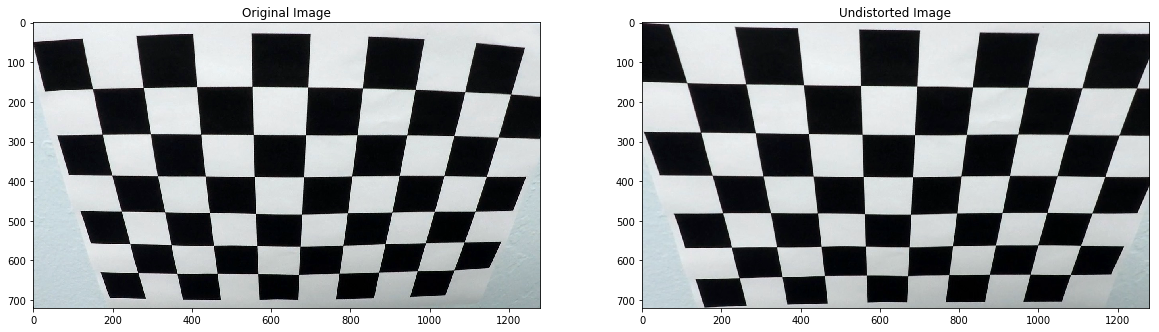

In [11]:
    
# Visualize undistortion
undist = cv2.undistort(original, mtx, dist, None, mtx)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(undist)
axes[1].set_title('Undistorted Image')

In [12]:
# Step through the list and search for chessboard corners
for image in images:
    fileName, image = image
    # Visualize undistortion on test images
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    image_name=os.path.split(fileName)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)

../output_images/undistorted_calibration1.jpg
../output_images/undistorted_calibration10.jpg
../output_images/undistorted_calibration11.jpg
../output_images/undistorted_calibration12.jpg
../output_images/undistorted_calibration13.jpg
../output_images/undistorted_calibration14.jpg
../output_images/undistorted_calibration15.jpg
../output_images/undistorted_calibration16.jpg
../output_images/undistorted_calibration17.jpg
../output_images/undistorted_calibration18.jpg
../output_images/undistorted_calibration19.jpg
../output_images/undistorted_calibration2.jpg
../output_images/undistorted_calibration20.jpg
../output_images/undistorted_calibration3.jpg
../output_images/undistorted_calibration4.jpg
../output_images/undistorted_calibration5.jpg
../output_images/undistorted_calibration6.jpg
../output_images/undistorted_calibration7.jpg
../output_images/undistorted_calibration8.jpg
../output_images/undistorted_calibration9.jpg


## Pipeline (test images)

Distortion correction that was calculated via camera calibration has been correctly applied to each image. An example of a distortion corrected image should be included in the writeup (or saved to a folder) and submitted with the project.

In [13]:
# Load test images.
testimages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('../test_images/*.jpg')))

## Distortion correction

In [14]:
# Use calibration matrix to undistort image
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [15]:
testoriginalimages = []
testundistortedimages = []
# Step through the list and search for chessboard corners
for image in testimages:
    fileName, image = image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Visualize undistortion on test images
    dst = undistort(image)
    image_name=os.path.split(fileName)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    testoriginalimages.append(image)
    testundistortedimages.append(dst)
    print(write_name)

../output_images/undistorted_straight_lines1.jpg
../output_images/undistorted_straight_lines2.jpg
../output_images/undistorted_test1.jpg
../output_images/undistorted_test2.jpg
../output_images/undistorted_test3.jpg
../output_images/undistorted_test4.jpg
../output_images/undistorted_test5.jpg
../output_images/undistorted_test6.jpg


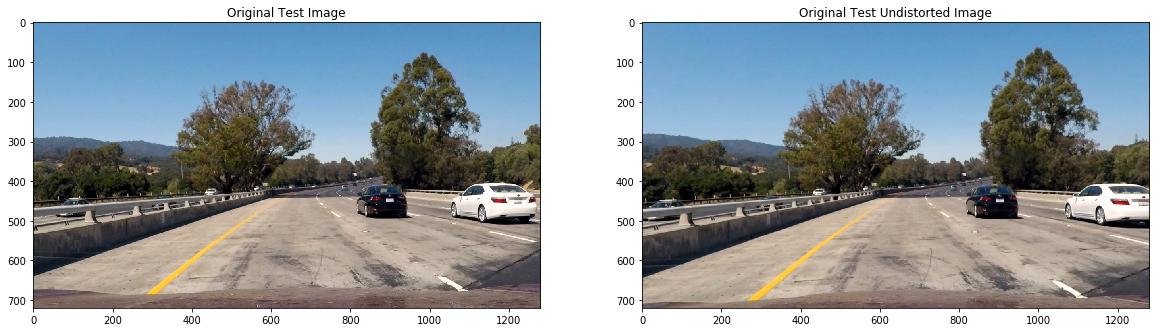

In [16]:
index = 2
testoriginal= testoriginalimages[index]
testundistorted = testundistortedimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(testoriginal)
axes[0].set_title('Original Test Image')
axes[1].imshow(testundistorted)
axes[1].set_title('Original Test Undistorted Image')

## Color/gradient threshold
Use color transforms, gradients, etc., to create a thresholded binary image. 

In [38]:
# #######################################
# Apply threshold using absolute value of Sobel x or y
# #######################################
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

# #######################################
# Apply threshold computing magnitude of gradient using Sobel x and y
# #######################################
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

# #######################################
# Apply threshold for an image, given a range and Sobel kernel
# #######################################
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

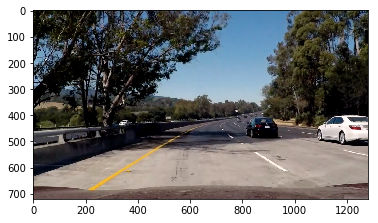

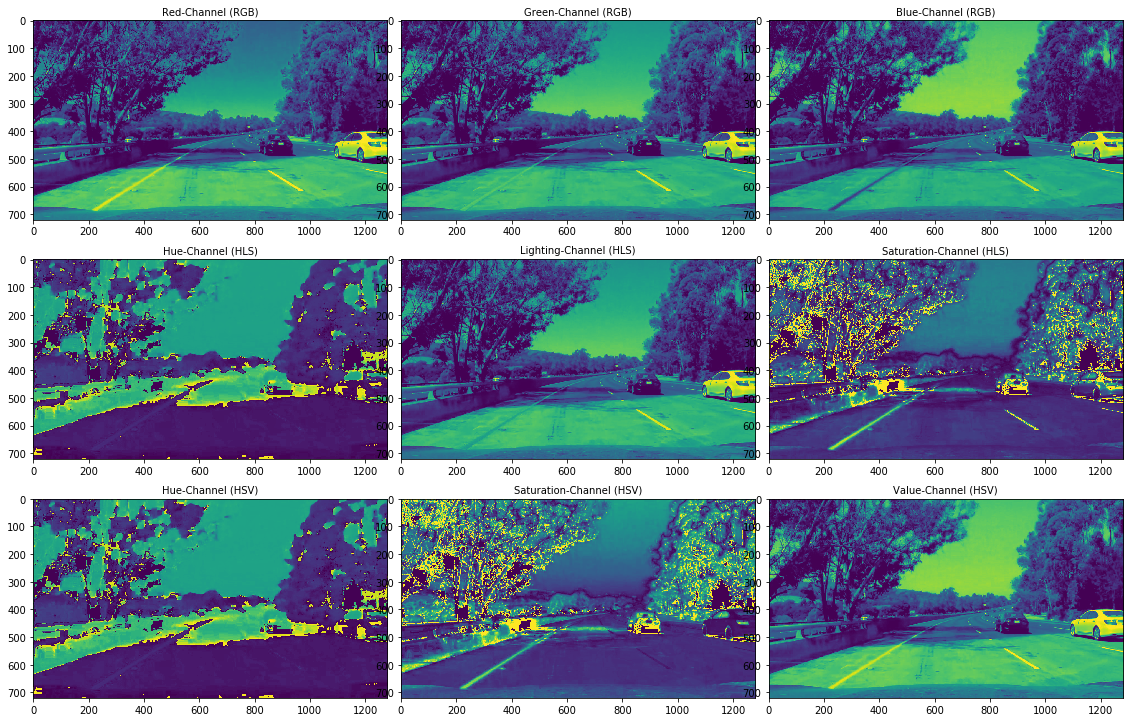

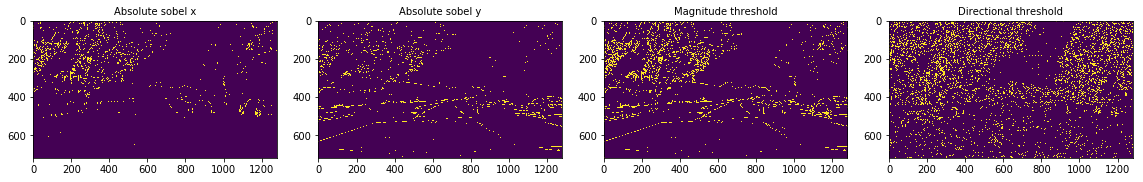

In [62]:
img = plt.imread('../test_images/test5.jpg')
plt.imshow(img)
plt.show()

# ########################################
# Display color space RGB, Hue space, Lightning
# ########################################
def display_channels(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H1 = HLS[:,:,0]
    L = HLS[:,:,1]
    S1 = HLS[:,:,2]
    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    H2 = HSV[:,:,0]
    S2 = HSV[:,:,1]
    V = HSV[:,:,2]
    fn, axes = plt.subplots(3, 3, figsize=(16, 10))
    fn.tight_layout()
    fn.subplots_adjust(hspace = .2, wspace=.01)
    
    axes[0][0].imshow(R)
    axes[0][0].set_title('Red-Channel (RGB)', fontsize=10)
    axes[0][1].imshow(G)
    axes[0][1].set_title('Green-Channel (RGB)', fontsize=10)
    axes[0][2].imshow(B)
    axes[0][2].set_title('Blue-Channel (RGB)', fontsize=10)
    axes[1][0].imshow(H1)
    axes[1][0].set_title('Hue-Channel (HLS)', fontsize=10)
    axes[1][1].imshow(L)
    axes[1][1].set_title('Lighting-Channel (HLS)', fontsize=10)
    axes[1][2].imshow(S1)
    axes[1][2].set_title('Saturation-Channel (HLS)', fontsize=10)
    axes[2][0].imshow(H2)
    axes[2][0].set_title('Hue-Channel (HSV)', fontsize=10)
    axes[2][1].imshow(S2)
    axes[2][1].set_title('Saturation-Channel (HSV)', fontsize=10)
    axes[2][2].imshow(V)
    axes[2][2].set_title('Value-Channel (HSV)', fontsize=10)
    plt.show()

display_channels(img)

# Sobel kernel
ksize = 3

# Lets see how different thresholding methods work on the test image.
def sobel_thresholds(img):
    fn, axes = plt.subplots(1, 4, figsize=(16, 10))
    fn.subplots_adjust(hspace = .002, wspace=.001)
    fn.tight_layout()

    axes[0].set_title('Absolute sobel x', fontsize=10)
    gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(50, 200))
    axes[0].imshow(gradx)
    
    axes[1].set_title('Absolute sobel y', fontsize=10)
    grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize, thresh=(50, 150))
    axes[1].imshow(grady)

    axes[2].set_title('Magnitude threshold', fontsize=10)
    mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(50, 150))
    axes[2].imshow(mag_binary)

    axes[3].set_title('Directional threshold', fontsize=10)
    dir_binary = dir_threshold(img, sobel_kernel=ksize, thresh=(0.02, 0.3))
    axes[3].imshow(dir_binary)

sobel_thresholds(img)

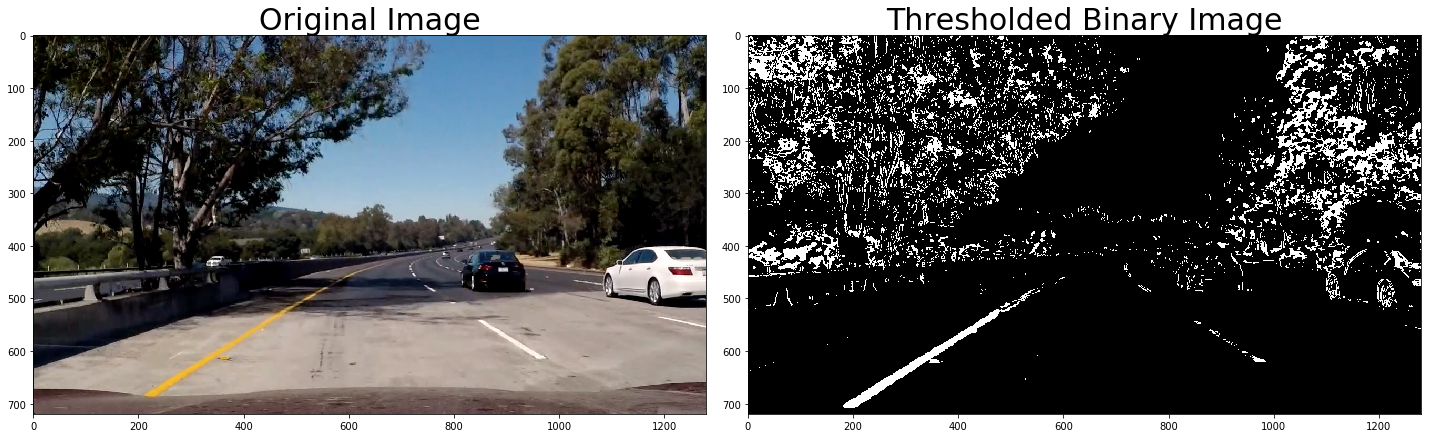

In [70]:
# ###########################################
# Combine undistort and threshold
# ###########################################
def undistort_and_threshold(img, h_thresh=(15, 100), s_thresh=(100, 255), sx_thresh=(50, 150)):
    # Undistort the image
    img = np.copy(undistort(img))
    # Apply sobel threshold
    sx_binary = abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=sx_thresh)
    # Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hls[:,:,0]
    s_channel = hls[:,:,2]
    # Threshold color channel (hue and saturation)
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[((h_binary == 1) & (s_binary == 1)) | (sx_binary == 1)] = 1
    return combined_binary

img = plt.imread('../test_images/test5.jpg')
result = undistort_and_threshold(img)

# Show original and binary image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(result, cmap='gray')
ax2.set_title('Thresholded Binary Image', fontsize=30)


In [101]:
def warp_img(img, src, dst):
    h,w = img.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return M, warped
    
def unwarp_img(img, src, dst):
    h,w = img.shape[:2]
    M = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return M, warped
    
def perspective_transform(img):
    h,w = img.shape[:2]
    # Define 4 source points (which takes shape of trapezoid)
    src = np.float32([[170, img.shape[0]], [550, 460], 
                      [745, 460], [1200, img.shape[0]]])
    # Define 4 destination points (which takes shape of rectangle)
    dst = np.float32([[100, img.shape[0]], [100, 0], 
                      [1100, 0], [1100, img.shape[0]]])
    # Compute the perspective transform, M, given source and destination points.
    Minv, warped = unwarp_img(img, src, dst)
    M, warped = warp_img(img, src, dst)
    return warped, M, Minv, src

def perspective_transform_helper(img):
    warped,_,_,_ = perspective_transform(img)
    return warped

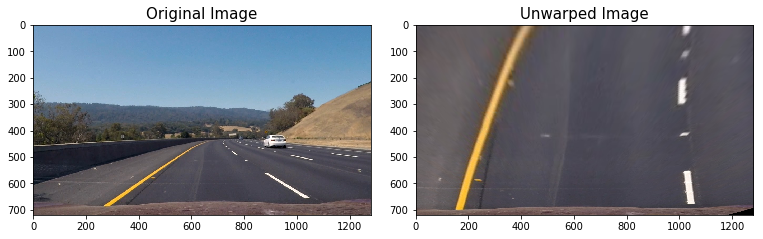

In [124]:
def display_unwarped(img, cmap='gray'):
    #corners = np.float32([[190,720],[589,457],[698,457],[1145,720]])
    #corner_tuples=[]
    #for ind,c in enumerate(corners):
    #    corner_tuples.append(tuple(corners[ind]))
    
    #cv2.line(img, corner_tuples[0], corner_tuples[1], color=[0,255,0], thickness=2)
    #cv2.line(img, corner_tuples[1], corner_tuples[2], color=[0,255,0], thickness=2)
    #cv2.line(img, corner_tuples[2], corner_tuples[3], color=[0,255,0], thickness=2)
    #cv2.line(img, corner_tuples[3], corner_tuples[0], color=[0,255,0], thickness=2)

    result,_,_,src = perspective_transform(img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    f.tight_layout()

    ax1.imshow(img,cmap=cmap)
    ax1.set_title('Original Image', fontsize=15)
    ax2.imshow(result,cmap=cmap)
    ax2.set_title('Unwarped Image', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#img = plt.imread('../test_images/straight_lines1.jpg')
img = plt.imread('../test_images/test3.jpg')
display_unwarped(img)

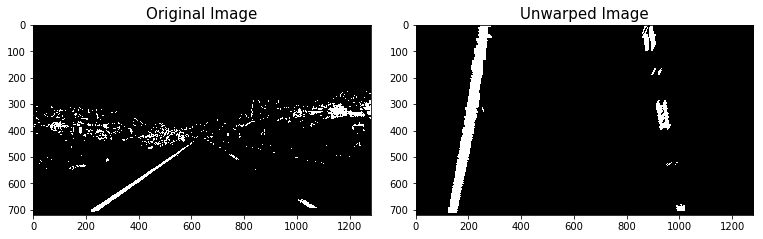

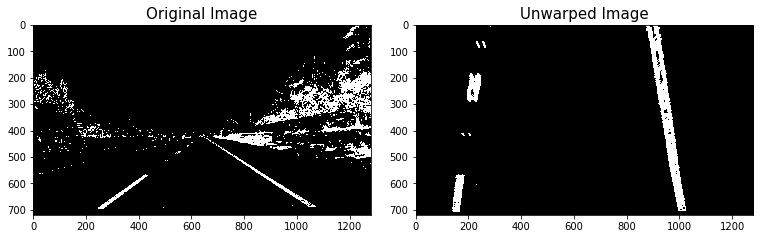

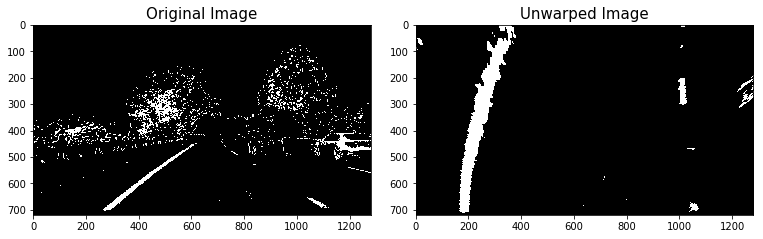

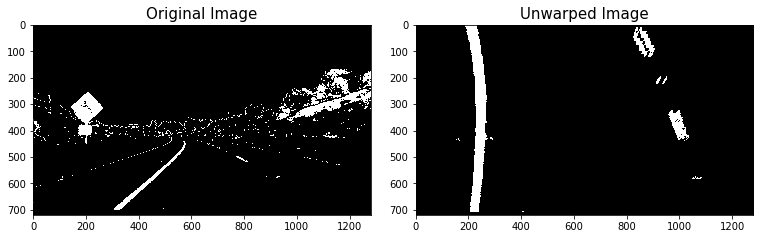

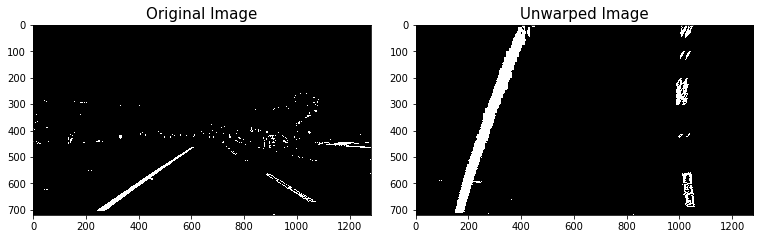

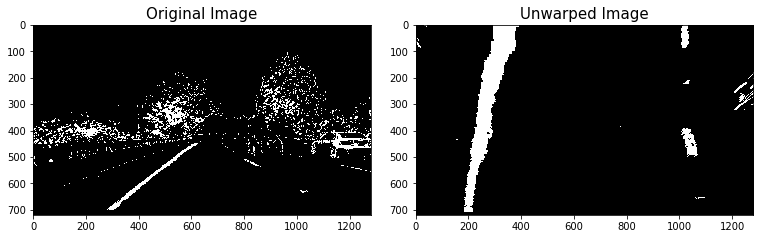

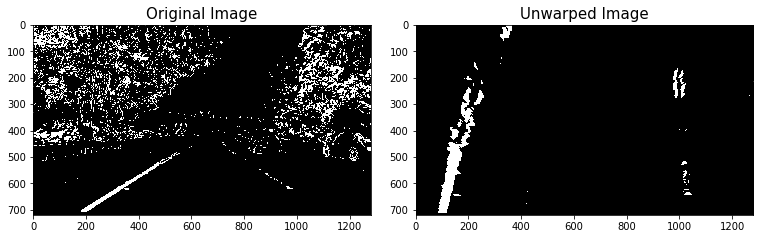

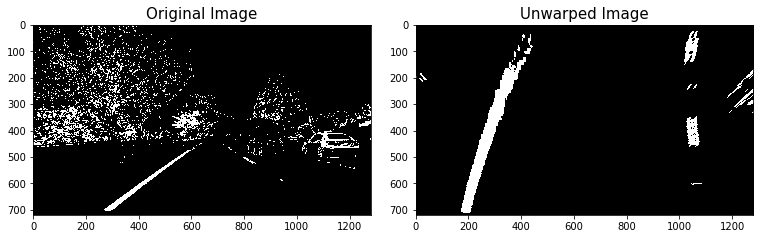

In [125]:
def display_test_unwarped():
    testimages = glob.glob('../test_images/*.jpg')
    for filename in testimages:
        img = plt.imread(filename)
        display_unwarped(undistort_and_threshold(img))

display_test_unwarped()

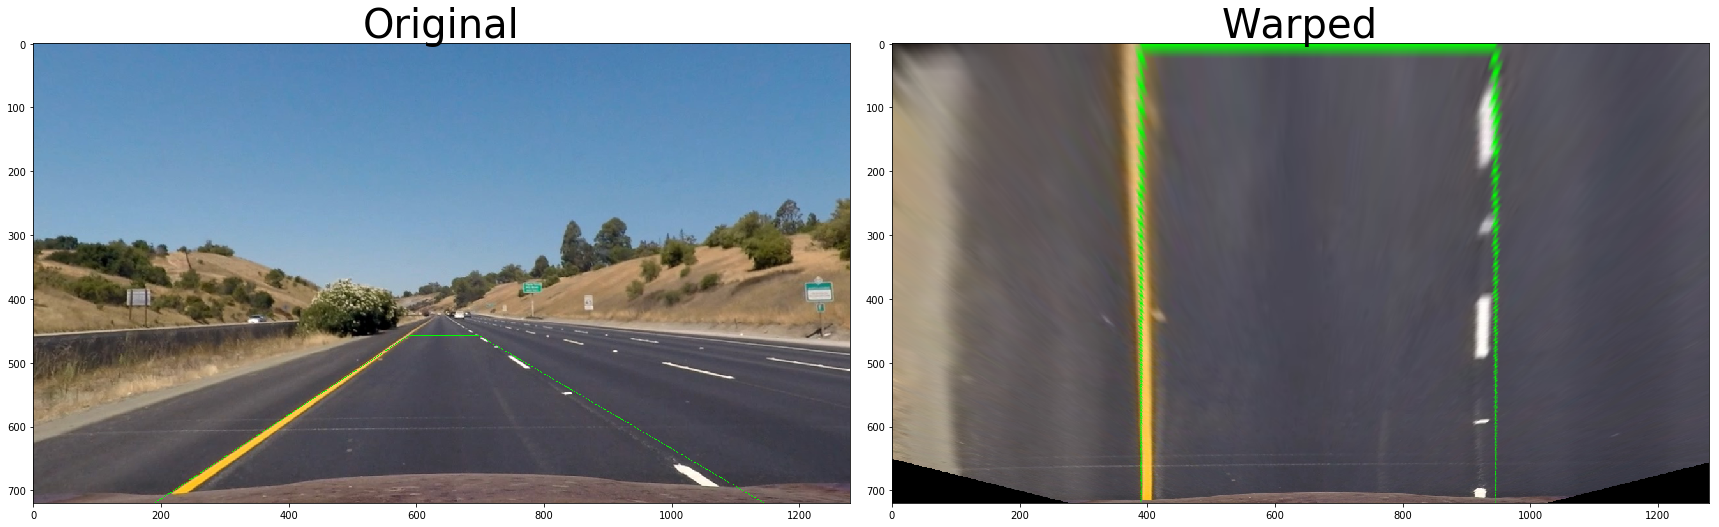

In [103]:
img=plt.imread('../test_images/straight_lines1.jpg')
corners = np.float32([[190,720],[589,457],[698,457],[1145,720]])
img = cv2.undistort(img, mtx, dist, None, mtx)
imshape = img.shape

corner_tuples=[]
for ind,c in enumerate(corners):
    corner_tuples.append(tuple(corners[ind]))

cv2.line(img, corner_tuples[0], corner_tuples[1], color=[0,255,0], thickness=1)
cv2.line(img, corner_tuples[1], corner_tuples[2], color=[0,255,0], thickness=1)
cv2.line(img, corner_tuples[2], corner_tuples[3], color=[0,255,0], thickness=1)
cv2.line(img, corner_tuples[3], corner_tuples[0], color=[0,255,0], thickness=1)

warped,_ = warp(img) 
plt.imsave(out_dir+'straight_green.jpg',img)
plt.imsave(out_dir+'straight_green_warped.jpg',warped)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Warped', fontsize=40)

## ColorSpace Visualize

## Image Processing Pipeline

In [ ]:
# ###################################
# Pipeline takes an image and identifies lane
# ###################################
def pipeline(img):
    # Undistort
    img_undistort = undistort(img)
    
    # Perspective Transform
    img_unwarp, M, Minv = unwarp(img_undistort, src, dst)

    # Sobel Absolute (using default parameters)
    #img_sobelAbs = abs_sobel_thresh(img_unwarp)

    # Sobel Magnitude (using default parameters)
    #img_sobelMag = mag_thresh(img_unwarp)
    
    # Sobel Direction (using default parameters)
    #img_sobelDir = dir_thresh(img_unwarp)
    
    # HLS S-channel Threshold (using default parameters)
    #img_SThresh = hls_sthresh(img_unwarp)

    # HLS L-channel Threshold (using default parameters)
    img_LThresh = hls_lthresh(img_unwarp)

    # Lab B-channel Threshold (using default parameters)
    img_BThresh = lab_bthresh(img_unwarp)
    
    # Combine HLS and Lab B channel thresholds
    combined = np.zeros_like(img_BThresh)
    combined[(img_LThresh == 1) | (img_BThresh == 1)] = 1
    return combined, Minv